In [15]:
from preprocessing_mne import *
import matplotlib.pyplot as plt
import numpy as np

In [16]:
SUBJECT = 2
tmin = -5
tmax = 15

In [17]:
raw_intensity = load_raw_data(SUBJECT, force_download=False)
raw_haemo = preprocess_raw_data(raw_intensity)
epochs = extract_epochs(raw_haemo, tmin, tmax, verbose=True)

Reading 0 ... 18874  =      0.000 ...  2415.872 secs...
Not setting metadata
90 matching events found
Setting baseline interval to [-4.992, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 90 events and 157 original time points ...
    Rejecting  epoch based on HBO : ['S7_D7 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S7_D7 hbo']
    Rejecting  epoch based on HBO : ['S3_D2 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo', 'S7_D7 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S7_D7 hbo']
    Rejecting  epoch based on HBO : ['S7_D7 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S7_D7 hbo']
    Rejecting  epoch based on HBO : ['S7_D

In [18]:
picks = mne.pick_types(raw_intensity.info, meg=False, fnirs=True)
dists = mne.preprocessing.nirs.source_detector_distances(raw_intensity.info, picks=picks)
raw_intensity.pick(picks[dists > 0.01])

# Convert raw intensity to optical density
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)

Reading 0 ... 18874  =      0.000 ...  2415.872 secs...


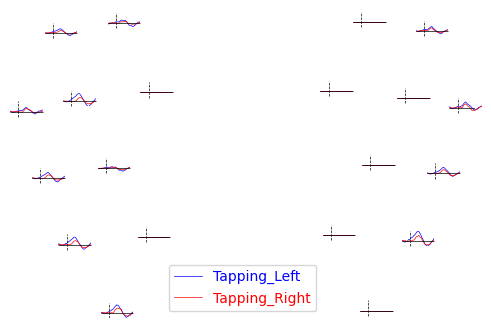

In [19]:
# One time-series plot per channel laid out in the topographic map
# visualizing blue and green HbO response on the left and right side of the brain respectively

fig, ax = plt.subplots(figsize=(6, 4))

evokeds = [
    epochs["Tapping_Left"].average(picks="hbo"),
    epochs["Tapping_Right"].average(picks="hbo")
]
colors = ["b", "r"]

mne.viz.plot_evoked_topo(
    evokeds,
    color=colors,
    axes=ax,
    legend=True,
)
plt.show()


In [20]:
# Loop through the channels in raw_od.info['chs'].
for idx, ch in enumerate(raw_od.info["chs"]):
    name = ch["ch_name"]
    loc = ch.get("loc")

    # Check if location data is available (first three values are the x, y, z coordinates)
    if loc is None or np.all(np.array(loc[:3]) == 0):
        side = "unknown (no location data)"
    else:
        x = loc[0]
        # print(f"Channel {ch['ch_name']} location: x={x}, y={loc[1]}, z={loc[2]}")
        # Convention: negative x -> left, positive x -> right, zero -> center
        if x < 0:
            side = "left"
        elif x > 0:
            side = "right"
        else:
            side = "center"

    # Determine the signal type from the channel name (case-insensitive)
    if "hbo" in name.lower():
        signal_type = "hbo"
    elif "hbr" in name.lower():
        signal_type = "hbr"
    else:
        signal_type = "unknown"

    print(f"Channel {idx}: {name} | Side: {side} | Signal type: {signal_type}")

Channel 0: S1_D1 760 | Side: left | Signal type: unknown
Channel 1: S1_D1 850 | Side: left | Signal type: unknown
Channel 2: S1_D2 760 | Side: left | Signal type: unknown
Channel 3: S1_D2 850 | Side: left | Signal type: unknown
Channel 4: S1_D3 760 | Side: left | Signal type: unknown
Channel 5: S1_D3 850 | Side: left | Signal type: unknown
Channel 6: S2_D1 760 | Side: left | Signal type: unknown
Channel 7: S2_D1 850 | Side: left | Signal type: unknown
Channel 8: S2_D3 760 | Side: left | Signal type: unknown
Channel 9: S2_D3 850 | Side: left | Signal type: unknown
Channel 10: S2_D4 760 | Side: left | Signal type: unknown
Channel 11: S2_D4 850 | Side: left | Signal type: unknown
Channel 12: S3_D2 760 | Side: left | Signal type: unknown
Channel 13: S3_D2 850 | Side: left | Signal type: unknown
Channel 14: S3_D3 760 | Side: left | Signal type: unknown
Channel 15: S3_D3 850 | Side: left | Signal type: unknown
Channel 16: S4_D3 760 | Side: left | Signal type: unknown
Channel 17: S4_D3 850 | 